In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import load, save, CellPlot, CellListPlot
from tqdm.auto import tqdm

In [45]:
ph = 500

In [48]:
with open(f'matched_names/m_cells_ph_{ph}_match.txt', 'r') as f:
    m_names = f.readlines()
    
m_names = list([n.rstrip() for n in m_names])

In [50]:
with open(f'matched_names/gt_cells_ph_{ph}_match.txt', 'r') as f:
    gt_names = f.readlines()

gt_names = list([n.rstrip() for n in gt_names])

In [8]:
gt_cells = load('cell_obj/cells_final_selected.hdf5')

In [9]:
save('cell_obj/cells_final_selected_10k.hdf5', gt_cells[:10000])

In [46]:
m_cells = load(f'cell_obj/cell_ph_{ph}_raw.hdf5')

5679 8264


<IPython.core.display.Javascript object>


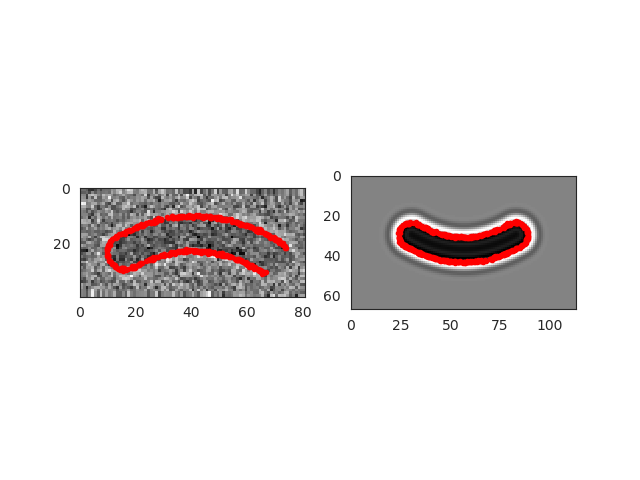

In [66]:
# m_i = m_cells.name.tolist().index(m_names[3927])
# g_i = gt_cells.name.tolist().index(gt_names[3927])

m_i = m_bk.name.tolist().index('img824c11')
g_i = gt_cells.name.tolist().index('Cell_08282')
print(m_i, g_i)
cp_m = CellPlot(m_cells[m_i])
cp_gt = CellPlot(gt_cells[g_i])

fig, axes = plt.subplots(1, 2)
cp_m.imshow('brightfield', ax=axes[0])
cp_m.plot_storm(ax=axes[0], data_name='storm_outer')

cp_gt.imshow('brightfield', ax=axes[1])
cp_gt.plot_storm(ax=axes[1], data_name='storm_outer')

<IPython.core.display.Javascript object>


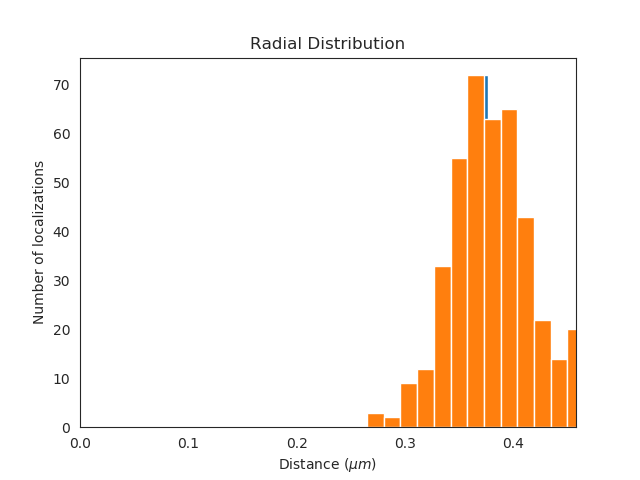

In [53]:
plt.figure()
h = cp_gt.hist_r_storm('storm_inner', norm_x=False)
h = cp_m.hist_r_storm('storm_inner', norm_x=False)

In [54]:
m_bk = m_cells.copy()

In [26]:
cutoff = 1000 / 80

In [62]:
m_remove = []
gt_remove = []
for m_name, gt_name in tqdm(zip(m_names, gt_names), total=len(m_names)):
    m_i = m_cells.name.tolist().index(m_name)
    gt_i = gt_cells.name.tolist().index(gt_name)
    
    m_c = m_cells[m_i]
    gt_c = gt_cells[gt_i] 
    
    for elem_name in ['storm_inner', 'storm_outer']:
        if len(m_c.data.data_dict[elem_name]) > len(gt_c.data.data_dict[elem_name]):
            r = m_c.coords.calc_rc(m_c.data.data_dict[elem_name]['x'],m_c.data.data_dict[elem_name]['y'])
            b = r < cutoff
            
            m_c.data.data_dict[elem_name] = m_c.data.data_dict[elem_name][b].copy()
            try:
                assert len(m_c.data.data_dict[elem_name]) == len(gt_c.data.data_dict[elem_name])
            except AssertionError:
                m_remove.append(m_name)
                gt_remove.append(gt_name)
            
        elif len(m_c.data.data_dict[elem_name]) < len(gt_c.data.data_dict[elem_name]):
            m_remove.append(m_name)
            gt_remove.append(gt_name)
            
m_final = list([name for name in m_names if name not in m_remove])
gt_final = list([name for name in gt_names if name not in gt_remove])

Too few 8 21
Too few 8 21
Too few 52 68
Too few 52 68
Too few 204 278
Too few 204 278
Too few 566 799
Too few 566 799
Too few 621 869
Too few 621 869
Too few 713 993
Too few 713 993
Too few 712 988
Too few 712 988
Too few 709 990
Too few 709 990
Too few 762 1073
Too few 762 1073
Too few 821 1142
Too few 822 1150
Too few 822 1150
Too few 1185 1688
Too few 1185 1688
Too few 1345 1899
Too few 1345 1899
Too few 1349 1906
Too few 1440 2026
Too few 1440 2026
Too few 1522 2148
Too few 1522 2148
Too few 1714 2414
Too few 1714 2414
Too few 1769 2487
Too few 1769 2487
Too few 1767 2481
Too few 1767 2481
Too few 1956 2759
Too few 1956 2759
Too few 1966 2757
Too few 1966 2757
Too few 1975 2789
Too few 1975 2789
Too few 1974 2781
Too few 2128 2990
Too few 2128 2990
Too few 2397 3372
Too few 2397 3372
Too few 2427 3404
Too few 2427 3404
Too few 2725 3841
Too few 2725 3841
Too few 2849 4006
Too few 2849 4006
Too few 2844 4009
Too few 2844 4009
Too few 2900 4081
Too few 2900 4081
Too few 2912 4108
Too

Too few 5587 8115
Too few 5588 8114
Too few 5588 8114
Too few 5599 8142
Too few 5597 8139
Too few 5597 8139
Too few 5618 8180
Too few 5618 8180
Too few 5637 8201
Too few 5637 8201
Too few 5640 8206
Assert 5679 8264
img824c11 Cell_08282
Assert 5679 8264
img824c11 Cell_08282
Too few 5684 8269
Too few 5684 8269
Too few 5691 8286
Too few 5691 8286
Too few 5699 8295
Too few 5699 8295
Too few 5695 8291
Too few 5707 8301
Too few 5707 8301
Too few 5721 8330
Too few 5721 8330
Too few 5734 8359
Too few 5740 8355
Too few 5740 8355
Too few 5751 8386
Too few 5751 8386
Too few 5754 8382
Too few 5754 8382
Too few 5762 8405
Too few 5765 8409
Too few 5765 8409
Too few 5768 8404
Too few 5775 8416
Too few 5805 8456
Too few 5805 8456
Too few 5815 8474
Too few 5828 8488
Too few 5828 8488
Too few 5835 8510
Too few 5835 8510
Too few 5854 8539
Too few 5854 8539
Too few 5886 8593
Too few 5886 8593
Too few 5894 8605
Too few 5903 8616
Too few 5903 8616
Too few 5932 8642
Too few 5932 8642
Too few 5937 8656
Too fe

In [68]:
len(gt_final)

6394